In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [5]:
cleansed=cleansed_data()
total_vol=calculate_dollar_volume(cleansed)

ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool
MEXDER-10YR BOND
ZCE-RAPESEED MEAL
BMF-US DOLLAR
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
OSX-NIKKE

In [6]:
cleansed.count().count()

142

# Volume of contracts load


In [9]:
def tsmom_improved2(data,months):
    vol=pd.ewmstd(data.pct_change(),250)*math.sqrt(12)
    data = data.resample(rule='m',how='last')
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position
data = cleansed.resample(rule='m').last()[:'2016']
pos=tsmom_improved2(data,12)
pnl=calc_pnl(pos,data)
sr=calc_Sharpe(pnl)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=250).std(bias=False)
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  app.launch_new_instance()


In [10]:
q_pnl, q_means=quantile_pnl_and_means(cleansed,total_vol,pnl,4)

tsmom_model.py:62: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  means.append(cleansed.resample(rule='m',how='last')[mkts].pct_change()[str(y)].mean().mean())


In [41]:
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Sharpe']=sr
s=pd.Series()
for i in sr.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Volume']=np.log(total_vol.mean())
scaled=total_vol.resample(rule='m',how='last') * pd.ewmstd(cleansed.pct_change(),24,min_periods=12)
compare['Scaled Volume']=np.log(scaled.mean())

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=12,adjust=True,com=24).std(bias=False)


OSX-NIKKEI 225 INDEX


/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


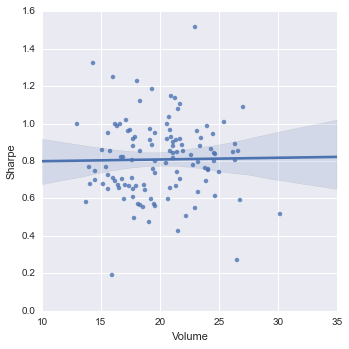

In [21]:
sns.lmplot(x='Volume',fit_reg=True,y='Sharpe',sharey=False,sharex=False,
           data=compare)

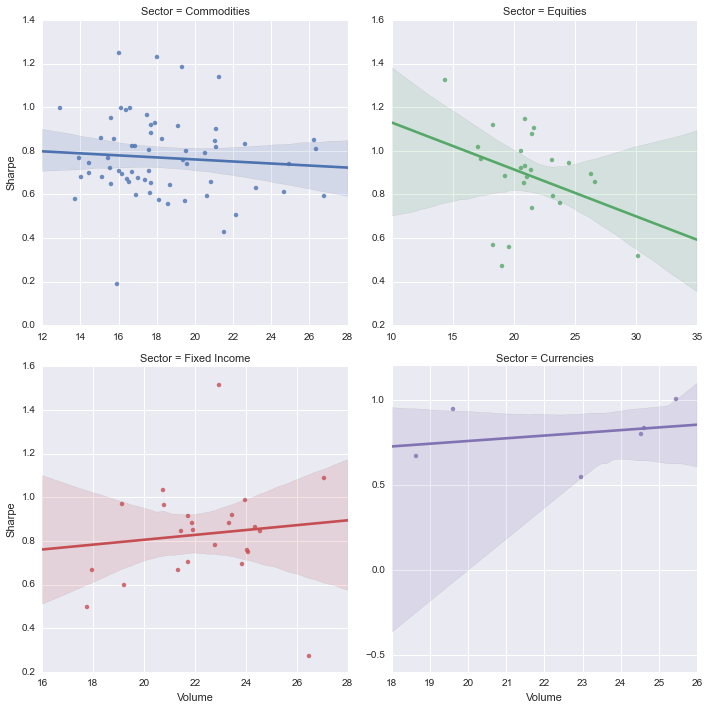

In [22]:
sns.lmplot(x='Volume',fit_reg=True,y='Sharpe',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)

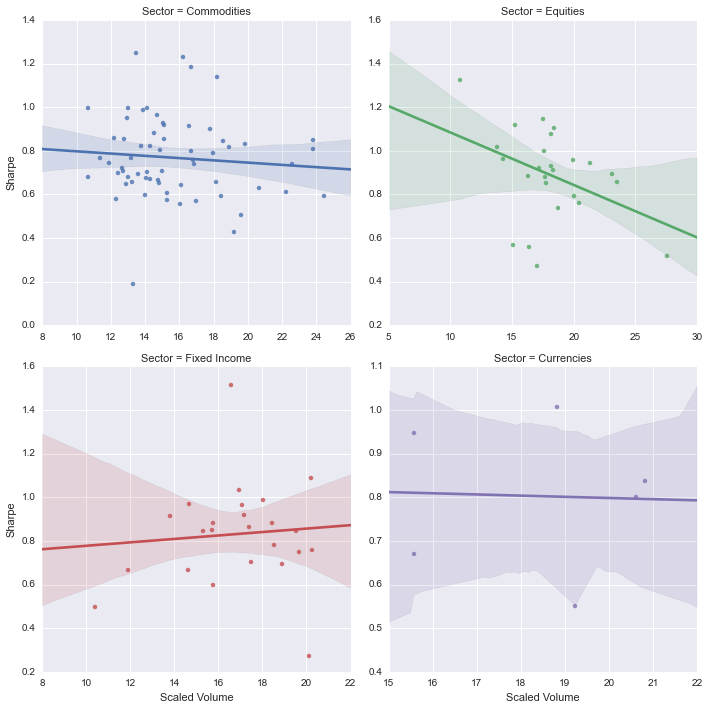

In [23]:
sns.lmplot(x='Scaled Volume',fit_reg=True,y='Sharpe',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)

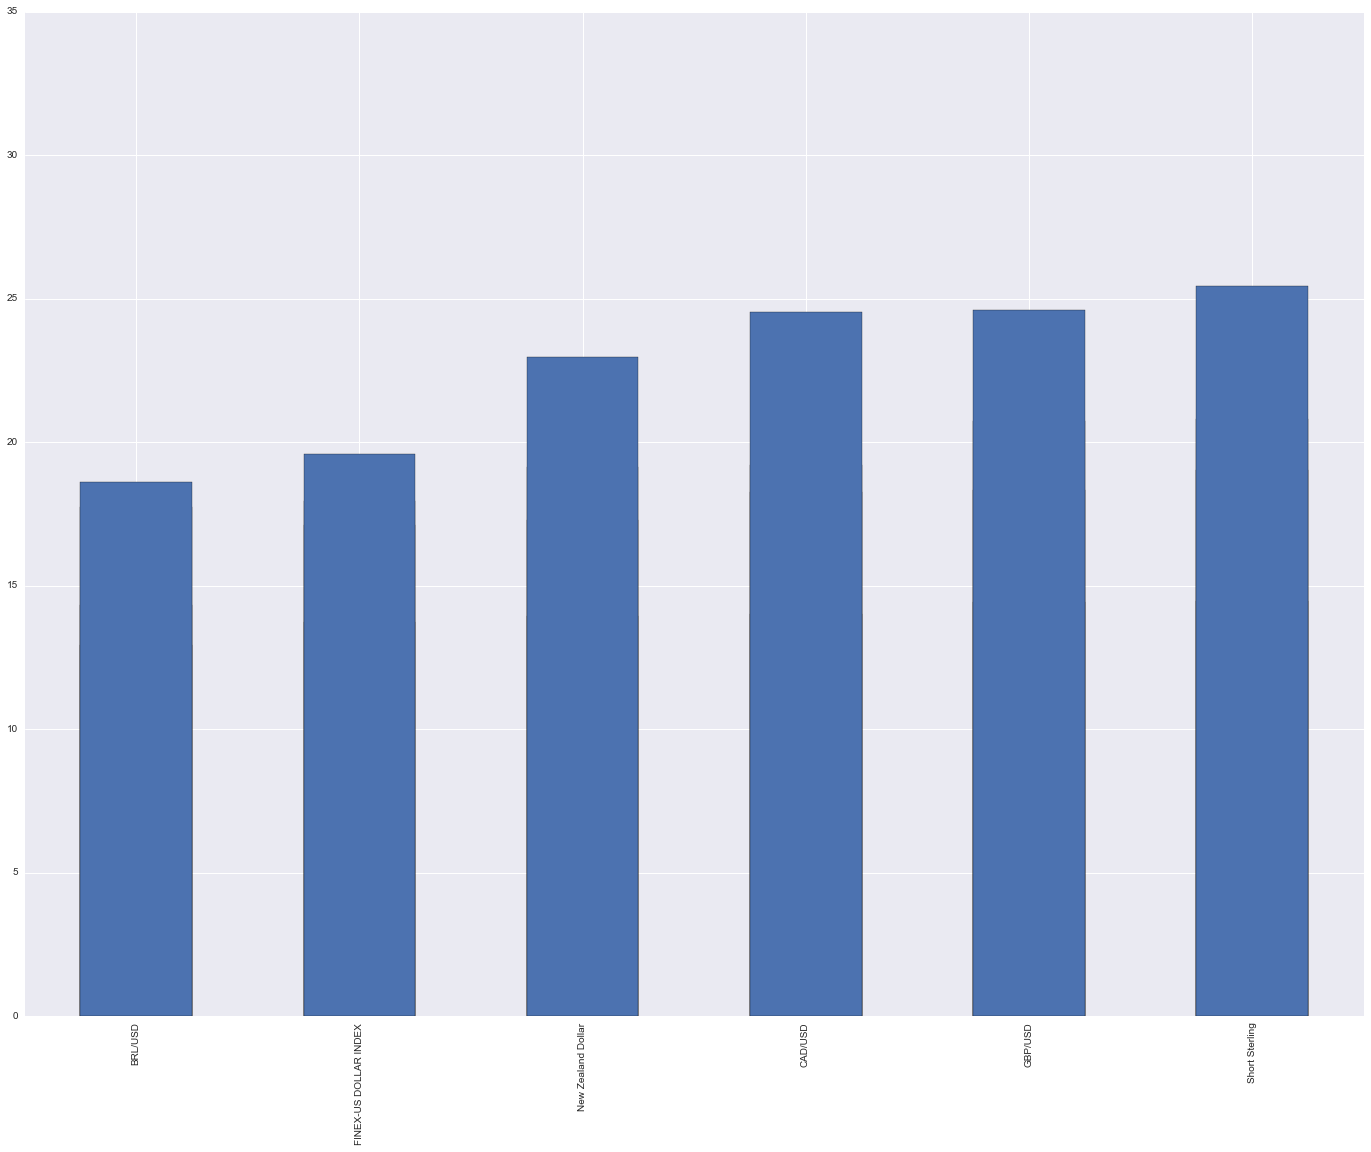

In [51]:
for s in ['Commodities', 'Equities', 'Fixed Income', 'Currencies']:
    compare[compare.Sector==s].Volume.dropna().sort_values().plot(kind='bar')

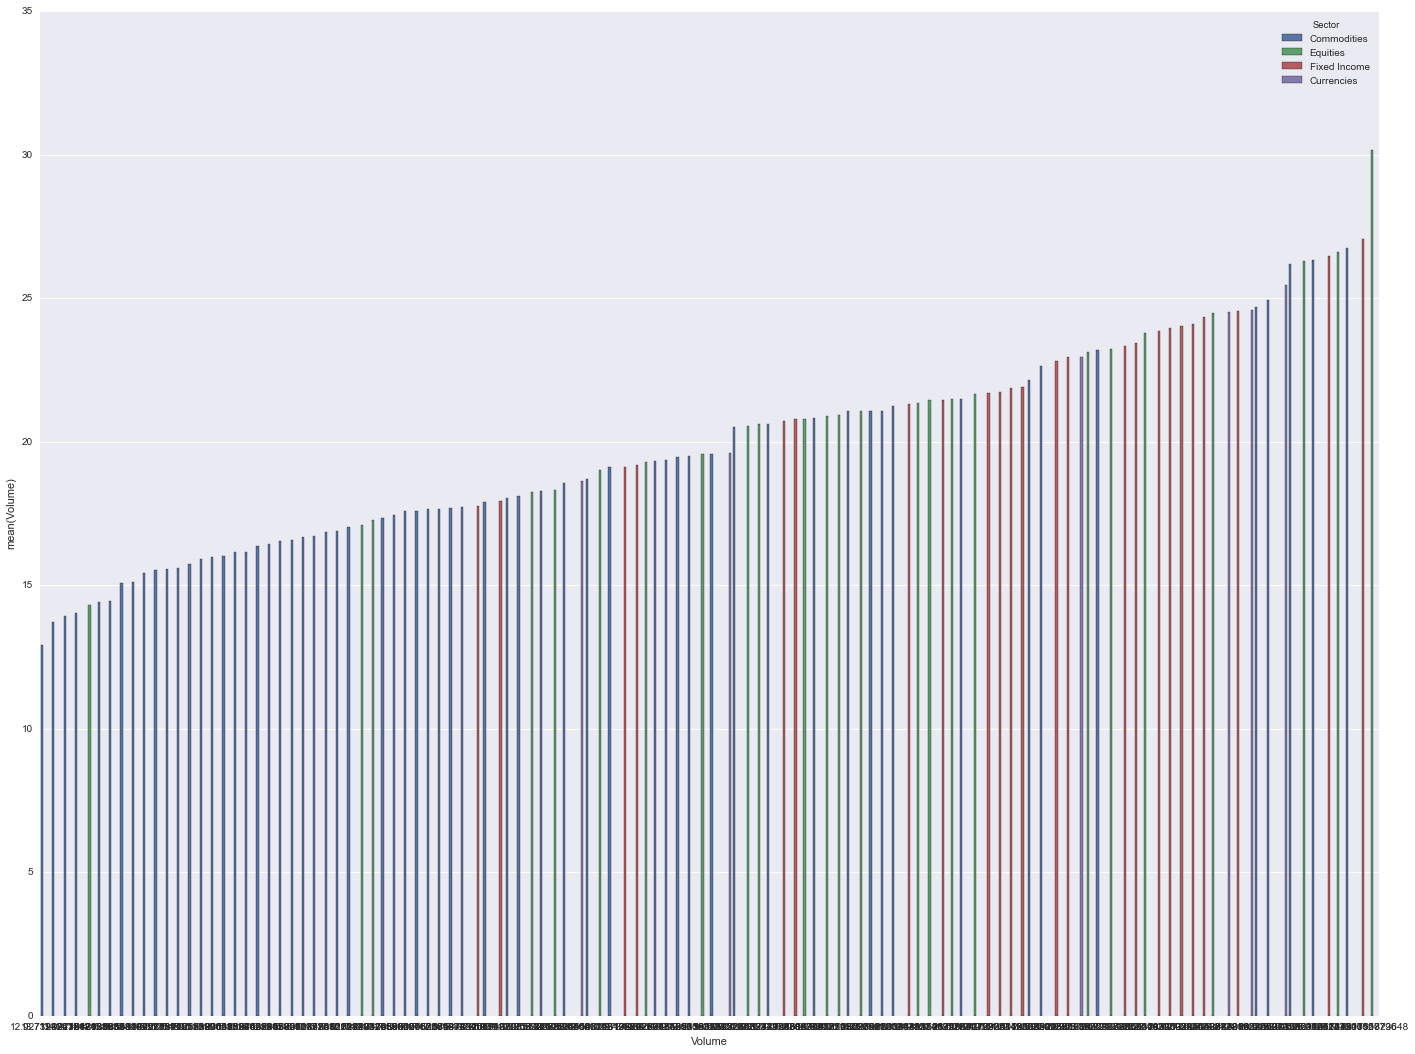

In [65]:
sns.barplot(data=compare,y='Volume',x='Volume',hue='Sector')

In [54]:
sns.barplot?
